In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split , KFold , GridSearchCV , cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
from xgboost import XGBClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report , accuracy_score , confusion_matrix , plot_confusion_matrix , plot_roc_curve , roc_auc_score ,\
roc_curve , plot_roc_curve

In [3]:
#df = pd.read_csv('/content/drive/MyDrive/creditcard.csv')
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

# Data Visualisation

### Distribution of Amount

Text(0.5, 1.0, 'Boxplot for Amount')

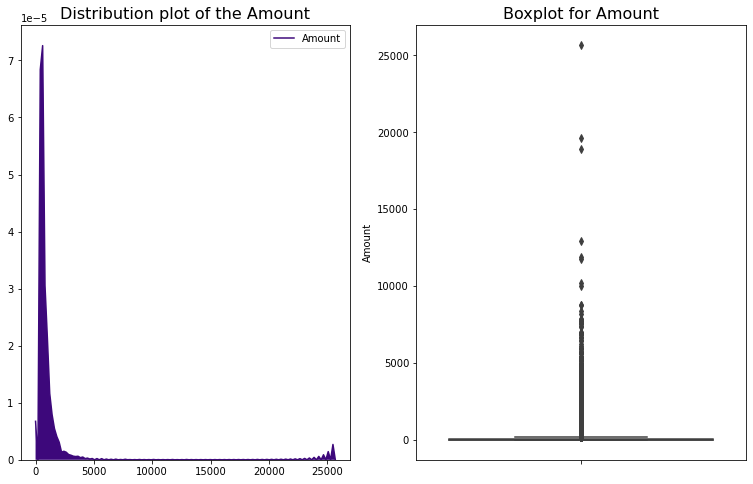

In [7]:
fig , (ax1 , ax2) = plt.subplots(1,2,figsize= (13,8))
sns.kdeplot(df[df['Class']==0]['Amount'],ax = ax1 , color = '#3D087B',legend=True,shade=True,alpha=1)
ax1.set_title('Distribution plot of the Amount' , fontsize = 16)

sns.boxplot(df['Amount'] , orient= 'v' , ax = ax2)
ax2.set_title('Boxplot for Amount', fontsize = 16)

#### So many outliers detected in the amount

### Distribution of Time

Text(0.5, 1.0, 'Boxplot for Time')

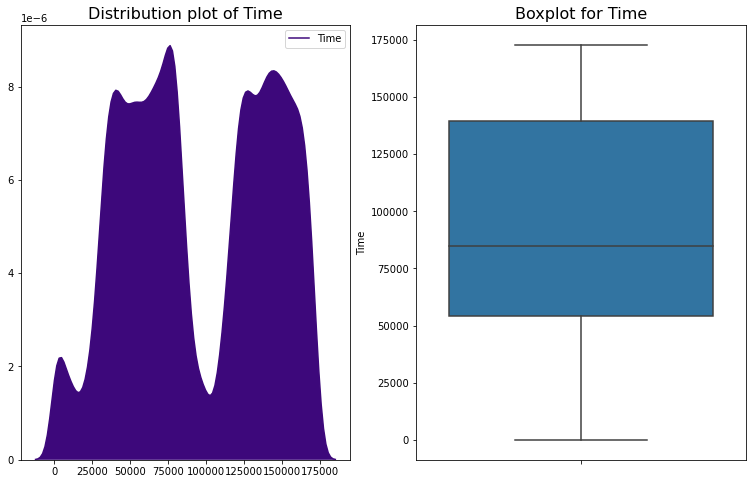

In [8]:
fig , (ax1 , ax2) = plt.subplots(1,2,figsize= (13,8))
sns.kdeplot(df[df['Class']==0]['Time'],ax = ax1 , color = '#3D087B',legend=True,shade=True,alpha=1)
ax1.set_title('Distribution plot of Time' , fontsize = 16)

sns.boxplot(df['Time'] , orient= 'v' , ax = ax2)
ax2.set_title('Boxplot for Time', fontsize = 16)

#### No outliers detected in Time

### Correlation plot

Text(0.5, 1.0, 'Heatmap of Correlation among attributes')

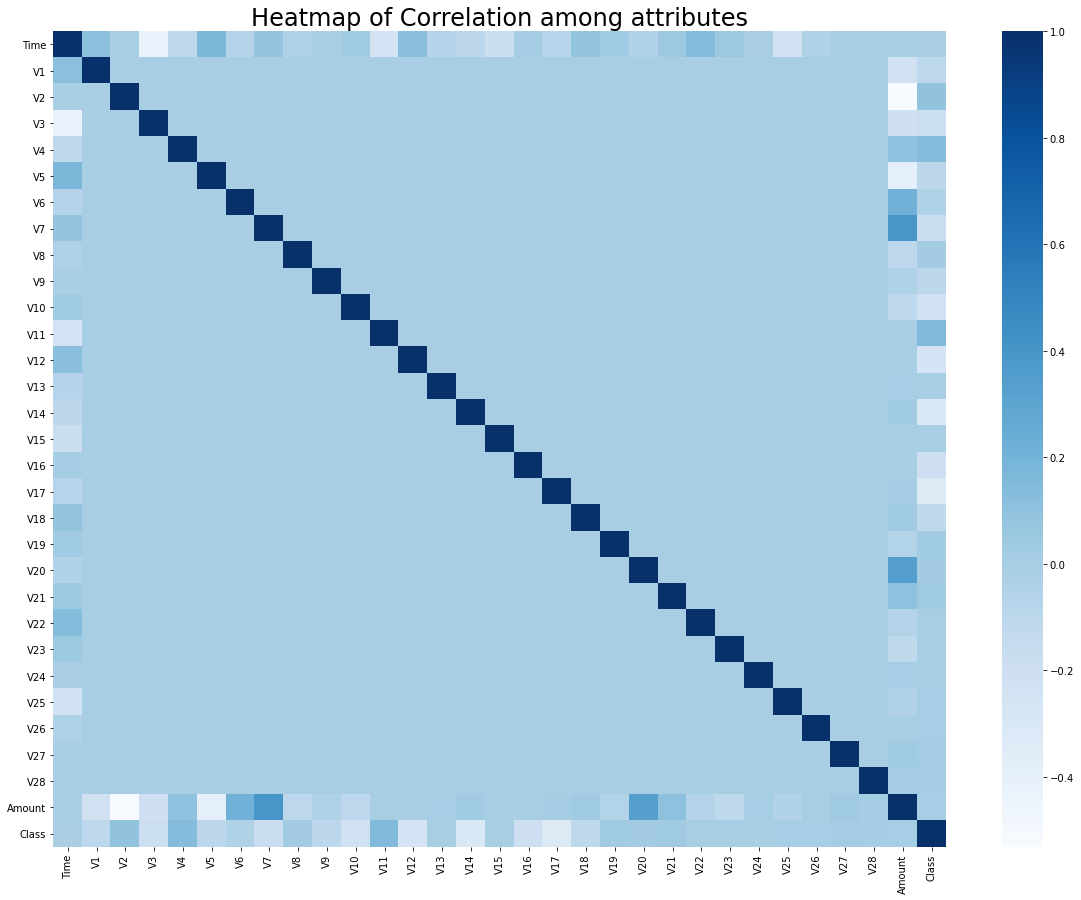

In [9]:
plt.figure(figsize = (20,15))
sns.heatmap(df.corr() , annot = False , cmap = 'Blues')
plt.title('Heatmap of Correlation among attributes' , fontsize = 24)

Text(0.5, 1.0, 'Amount vs Time')

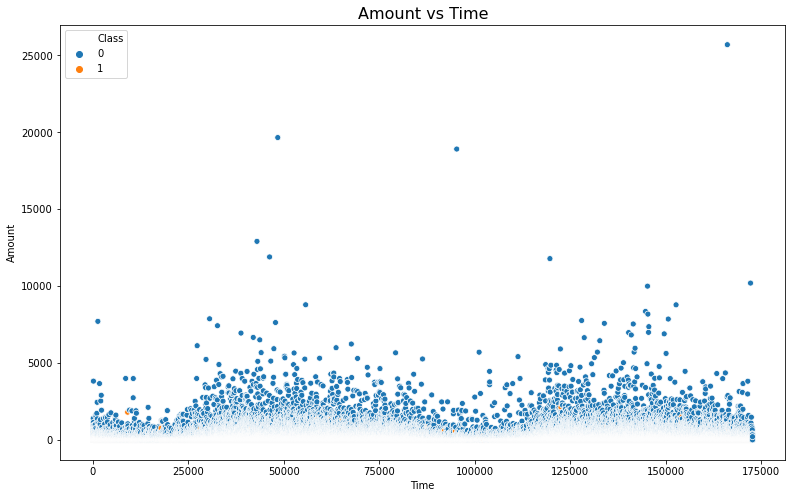

In [10]:
plt.figure(figsize= (13,8))
sns.scatterplot(y = df['Amount'] , x = df['Time'] , hue = df['Class'])
plt.title('Amount vs Time', fontsize = 16)

# Checking Class Imbalance

0    0.998273
1    0.001727
Name: Class, dtype: float64


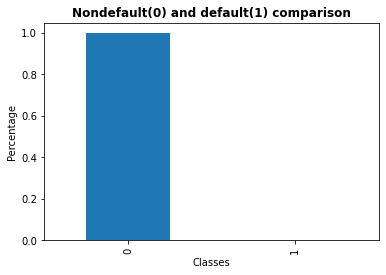

In [11]:
# Check target classes balancec
cla_bal = df['Class'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

### It can be observed that only 0.17% transactions accounts for fraud.

# Standardizing Amount and Time

#### Since there are a number of outliers present in Amount , we will use Robust Scaler instead of Standard Scaler

In [12]:
from sklearn.preprocessing import RobustScaler
scale = RobustScaler()
df['Amount'] = scale.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = scale.fit_transform(df['Time'].values.reshape(-1,1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0


# Separating target variable

In [13]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

# Handling imbalanced class

In [14]:
from imblearn.over_sampling import SMOTE

In [15]:
sm = SMOTE(random_state= 42)

In [16]:
X , y = sm.fit_resample(X , y.ravel())

1    0.5
0    0.5
Name: Class, dtype: float64


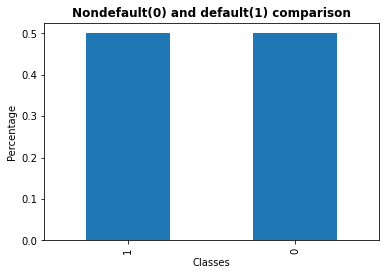

In [17]:
# Check target classes balancec
df2 = pd.DataFrame(y , columns= ['Class'])
cla_bal = df2['Class'].value_counts(normalize=True)
print(cla_bal)

# Plot the classes
cla_bal.plot(kind = 'bar')
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.show()

# Splitting into training and testing

In [18]:
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size = 0.30 , random_state = 42)

In [19]:
print(X_train.shape , '\n' , X_test.shape , '\n', y_train.shape , '\n' , y_test.shape)

(398041, 30) 
 (170589, 30) 
 (398041,) 
 (170589,)


# Modelling

## 1. Logistic Regression

In [20]:
clf_lr = LogisticRegression(random_state = 42)

In [21]:
clf_lr.fit(X_train , y_train)

LogisticRegression(random_state=42)

In [22]:
scores = cross_val_score(clf_lr , X_train , y_train , scoring = "roc_auc" , cv = 10)
roc_auc_lr = np.mean(scores)

In [23]:
# Creating a dataframe to keep record of auc scores
model = []
roc_auc = []
def performance(new_model , new_score):
    model.append(new_model)
    roc_auc.append(new_score)
    score_df = pd.DataFrame(zip(model , roc_auc) , columns = ['Model', 'ROC_AUC_Score'])
    #print(score_df)
    return score_df

In [24]:
performance('Logistic Regression', roc_auc_lr)

                 Model  ROC_AUC_Score
0  Logistic Regression        0.98927


,Model,ROC_AUC_Score
0,Logistic Regression,0.98927


In [25]:
# Define a function to compute Precision, Recall and F1 score
precision_list = []
recall_list = []
F1_list = []
def get_pre_rec_f1(model):
    y_pred = model.predict(X_test)
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp / (tp + fp)
    precision_list.append(precision)
    recall = tp / (tp + fn)
    recall_list.append(recall)
    F1 = (2 * precision * recall) / (precision + recall)
    F1_list.append(F1)
    evaluation_df = pd.DataFrame(zip(precision_list , recall_list , F1_list) , columns = ['Precision', 'Recall', 'F1_Score'])
    print(f'Precision:{precision:.3f}\nRecall:{recall:.3f}\nF1 score:{F1:.3f}')
    return evaluation_df

In [26]:
# Calculate precision, recall and F1 of Logistic Regression Model
get_pre_rec_f1(clf_lr)

Precision:0.976
Recall:0.927
F1 score:0.951


,Precision,Recall,F1_Score
0,0.975913,0.927185,0.950925


Logistic Regression performed really well on this dataset. But lets keep checking the performance of other models if they can perform better

## 2. Random Forest

In [27]:
# # Hyperparameter tuning

# # Create parameter grid  
# param_grid = {
#     'max_depth': [60, 90, 110],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [8, 10, 12],
#     'n_estimators': [100, 200, 300]
# }

# # Instantiate the model
# clf_rf = RandomForestClassifier()

# # Instantiate grid search model
# grid_search = GridSearchCV(estimator = clf_rf, param_grid = param_grid,    
#                           cv = 3, n_jobs = -1, verbose = 1)

# # Fit grid search to the data
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [28]:
# # Use the best parameters to fit the model

# clf_rf = RandomForestClassifier(**grid_search.best_params_)   
# clf_rf.fit(X_train,y_train)

# scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 5)
# roc_auc_rf = np.mean(scores)
# performance('Random Forest', scores)

In [29]:
# Use the best parameters to fit the model

clf_rf = RandomForestClassifier(max_depth = 30 , min_samples_leaf = 4 , min_samples_split = 8 , n_estimators = 20)   
clf_rf.fit(X_train,y_train)

scores = cross_val_score(clf_rf, X_train, y_train, scoring ="roc_auc", cv = 5)
roc_auc_rf = np.mean(scores)
performance('Random Forest', roc_auc_rf)

                 Model  ROC_AUC_Score
0  Logistic Regression       0.989270
1        Random Forest       0.999986


,Model,ROC_AUC_Score
0,Logistic Regression,0.989270
1,Random Forest,0.999986


In [30]:
get_pre_rec_f1(clf_rf)

Precision:1.000
Recall:1.000
F1 score:1.000


,Precision,Recall,F1_Score
0,0.975913,0.927185,0.950925
1,0.999706,0.999988,0.999847


## 3. XGBoost

In [31]:
from sklearn.model_selection import RandomizedSearchCV

In [32]:
# Number of trees
n_estimators = 10

# Minimum loss reduction required to make a further partition on a leaf node of the tree
# The larger gamma is, the more conservative the algorithm will be
gamma = np.arange(0.1,0.4,0.1)

# Default 0.3, range(0,1)
learning_rate = 0.1

# Maximum number of levels in tree
max_depth = 3

# Subsample ratio of the training instances.Range(0,1)
subsample = 0.5

# Subsample ratio of columns when constructing each tree. Range(0,1)
colsample_bytree = 0.5

# Control the balance of positive and negative weights
# Sum(negative instances) / sum(positive instances)
scale_pos_weight = [1,3.5]


# Create the random grid
random_grid_xgb = {'n_estimators': n_estimators,
                   'gamma': gamma,
                   'learning_rate':learning_rate,
                   'max_depth': max_depth,
                   'subsample':subsample,
                   'colsample_bytree':colsample_bytree,
                   'scale_pos_weight':scale_pos_weight
                  }
print(random_grid_xgb)

{'n_estimators': 10, 'gamma': array([0.1, 0.2, 0.3, 0.4]), 'learning_rate': 0.1, 'max_depth': 3, 'subsample': 0.5, 'colsample_bytree': 0.5, 'scale_pos_weight': [1, 3.5]}


In [33]:
# # Use randomized search to find best parameters

# xgboost = XGBClassifier()
# xgb_random = RandomizedSearchCV(estimator = xgboost, 
#                                 param_distributions = random_grid_xgb, 
#                                 n_iter = 5, 
#                                 cv = 3, 
#                                 verbose=1, 
#                                 random_state=42, 
#                                 n_jobs = -1,
#                                 scoring ='roc_auc')


# xgb_random.fit(X_train, y_train)   
# xgb_random.best_params_, xgb_random.best_score_

# print(xgb_random.best_params_,xgb_random.best_score_)

In [34]:
# XGBoost evaluation
clf_xgb = XGBClassifier(n_estimators= n_estimators,gamma= 0.1,learning_rate=learning_rate,max_depth= max_depth,\
                   subsample=subsample,\
                   colsample_bytree=colsample_bytree,\
                   scale_pos_weight=1)
clf_xgb.fit(X_train , y_train)
scores = cross_val_score(clf_xgb , X_train , y_train , cv = 5 , scoring = "roc_auc")
roc_auc_xgb = np.mean(scores)
performance('XGBoost' , roc_auc_xgb)

[13:49:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:49:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:49:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:49:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

,Model,ROC_AUC_Score
0,Logistic Regression,0.989270
1,Random Forest,0.999986
2,XGBoost,0.985101


In [35]:
get_pre_rec_f1(clf_xgb)

Precision:0.983
Recall:0.911
F1 score:0.946


,Precision,Recall,F1_Score
0,0.975913,0.927185,0.950925
1,0.999706,0.999988,0.999847
2,0.983100,0.911248,0.945812


## 4. ANN

In [36]:
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
clf_ann = Sequential()
clf_ann.add(Dense( units = 32 , activation = 'relu' , input_dim = X.shape[1]))
clf_ann.add(Dense( units = 16 , activation = 'relu'))
clf_ann.add(Dense( units = 1 , activation = 'sigmoid'))
clf_ann.compile(optimizer= 'adam' , loss = 'binary_crossentropy' , metrics= ['accuracy'])
clf_ann.fit(X_train , y_train , batch_size = 50 , epochs = 20  , validation_data= (X_test , y_test))

Epoch 1/20
7961/7961 [==============================] - 10s 1ms/step - loss: 0.0340 - accuracy: 0.9887 - val_loss: 0.0114 - val_accuracy: 0.9971
Epoch 2/20
7961/7961 [==============================] - 10s 1ms/step - loss: 0.0082 - accuracy: 0.9979 - val_loss: 0.0084 - val_accuracy: 0.9978
Epoch 3/20
7961/7961 [==============================] - 10s 1ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0057 - val_accuracy: 0.9985
Epoch 4/20
7961/7961 [==============================] - 10s 1ms/step - loss: 0.0046 - accuracy: 0.9990 - val_loss: 0.0047 - val_accuracy: 0.9989
Epoch 5/20
7961/7961 [==============================] - 11s 1ms/step - loss: 0.0040 - accuracy: 0.9991 - val_loss: 0.0041 - val_accuracy: 0.9992
Epoch 6/20
7961/7961 [==============================] - 10s 1ms/step - loss: 0.0035 - accuracy: 0.9992 - val_loss: 0.0036 - val_accuracy: 0.9992
Epoch 7/20
7961/7961 [==============================] - 10s 1ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0106 - val_ac

In [37]:
# Calculating ROC_AUC score

proba = clf_ann.predict_proba(X_test)
y_pred_ann = (proba > 0.5)
roc_auc_ann = roc_auc_score(y_test, y_pred_ann)
performance('Artificial Neural Network', roc_auc_ann)

                       Model  ROC_AUC_Score
0        Logistic Regression       0.989270
1              Random Forest       0.999986
2                    XGBoost       0.985101
3  Artificial Neural Network       0.999583


,Model,ROC_AUC_Score
0,Logistic Regression,0.989270
1,Random Forest,0.999986
2,XGBoost,0.985101
3,Artificial Neural Network,0.999583


In [38]:
# Calculating precision , recall and F1 score

tp , fp, fn , tn = confusion_matrix(y_pred_ann , y_test).ravel()

precision = tp / (tp+fp)

recall = tp / (tp + fn)

F1_score = 2 * ((precision*recall)/(precision+recall))

print('ANN model \n Precision = %.3f'%precision)
print('Recall = %.3f'%recall)
print('F1 Score = %.3f'%F1_score)

ANN model 
 Precision = 1.000
Recall = 0.999
F1 Score = 1.000


## 5. Naive Bayes

In [39]:
clf_gnb = GaussianNB()

In [40]:
clf_gnb.fit(X_train , y_train)

GaussianNB()

In [41]:
scores = cross_val_score(clf_gnb , X_train , y_train , cv = 5 , scoring = "roc_auc")
roc_auc_gnb = np.mean(scores)
performance('Gaussian NB' , roc_auc_gnb)

                       Model  ROC_AUC_Score
0        Logistic Regression       0.989270
1              Random Forest       0.999986
2                    XGBoost       0.985101
3  Artificial Neural Network       0.999583
4                Gaussian NB       0.950356


,Model,ROC_AUC_Score
0,Logistic Regression,0.989270
1,Random Forest,0.999986
2,XGBoost,0.985101
3,Artificial Neural Network,0.999583
4,Gaussian NB,0.950356


In [42]:
evaluation_df = get_pre_rec_f1(clf_gnb)

Precision:0.974
Recall:0.869
F1 score:0.919


,Precision,Recall,F1_Score
0,0.975913,0.927185,0.950925
1,0.999706,0.999988,0.999847
2,0.983100,0.911248,0.945812
3,0.974398,0.869423,0.918922


## Model Evaluation

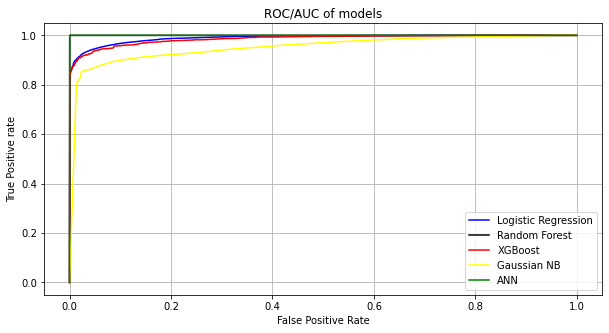

In [43]:
# Plot ROC_AUC curve of 3 models
 
fig,ax=plt.subplots(figsize=(10,5))

plot_roc_curve(clf_lr, X_test, y_test,ax=ax, color="blue",label='Logistic Regression')
plot_roc_curve(clf_rf, X_test, y_test,ax=ax, color="black",label='Random Forest')
plot_roc_curve(clf_xgb, X_test, y_test,ax=ax, color="red",label='XGBoost')
plot_roc_curve(clf_gnb , X_test , y_test , ax=ax , color = 'yellow' , label = 'Gaussian NB')
#plot_roc_curve(model , X_test , y_test , ax = ax , color = 'green' , label = 'ANN')

# ROC_AUC curve for ANN
proba = clf_ann.predict_proba(X_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, proba, pos_label=1)
#plt.subplot(ax)
plt.plot(fpr1, tpr1,color='green', label='ANN')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc = 'best')
plt.title('ROC/AUC of models')
plt.grid()
#plt.savefig('Comparison_of_models')

In [44]:
from sklearn.metrics import plot_precision_recall_curve , precision_recall_curve

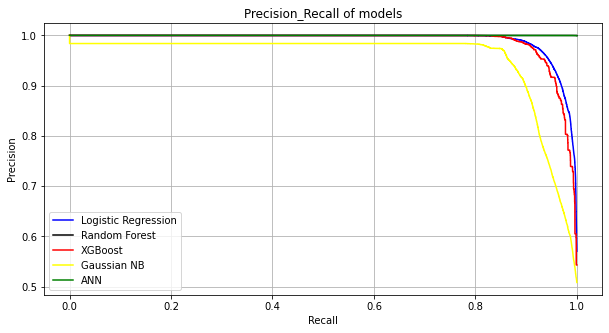

In [45]:
# Compare 3 models' Precision_recall curves

fig,ax=plt.subplots(figsize=(10,5))

plot_precision_recall_curve(clf_lr, X_test, y_test, ax=ax,color="blue",label='Logistic Regression')
plot_precision_recall_curve(clf_rf, X_test, y_test, ax=ax,color="black",label='Random Forest')
plot_precision_recall_curve(clf_xgb, X_test, y_test, ax=ax,color="red",label='XGBoost')
plot_precision_recall_curve(clf_gnb , X_test , y_test , ax = ax , color = 'yellow' , label = 'Gaussian NB')

# Precision-Recall curve  for ANN
proba = clf_ann.predict_proba(X_test)
ann_precision, ann_recall, _ = precision_recall_curve(y_test, proba)
ann_f1, ann_auc = 1, 0.999624
plt.plot(ann_recall, ann_precision, label='ANN' , color = 'green')



plt.title('Precision_Recall of models')
plt.grid()
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
#plt.savefig('PR model_comparison')

In [49]:
performance('','')

                       Model  ROC_AUC_Score
0        Logistic Regression       0.989270
1              Random Forest       0.999986
2                    XGBoost       0.985101
3  Artificial Neural Network       0.999583
4                Gaussian NB       0.950356
5                                  0.000000


,Model,ROC_AUC_Score
0,Logistic Regression,0.989270
1,Random Forest,0.999986
2,XGBoost,0.985101
3,Artificial Neural Network,0.999583
4,Gaussian NB,0.950356
5,,0.000000


In [ ]:
print(evaluation_df)